# Task 1:- Web Scrapping

# Scrapping Movies Data

In [65]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [66]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

In [67]:
# Write Your Code here
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
print(url_list)

['https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/the-substance', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3', 'https://www.justwatch.com/in/movie/meiyazhagan', 'https://www.justwatch.com/in/movie/venom-3-2024', 'https://www.justwatch.com/in/movie/vettaiyan', 'https://www.justwatch.com/in/movie/ntr-30', 'https://www.justwatch.com/in/movie/the-wild-robot', 'https://www.justwatch.com/in/movie/khel-khel-mein', 'https://www.justwatch.com/in/movie/do-patti', 'https://www.justwatch.com/in/movie/alien-romulus', 'https://www.justwatch.com/in/movie/thalapathy-68', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/longlegs', 'https://www.justwatch.com/in/movie/siddharth-roy', 'https://www.justwatch.com/in/movie/vedaa', 'https://www.justwatch.com/in/movie/level-cross', 'https://www.justwatch.com/in/movie/untitled-soorarai-pottru-remake', 'https://www.justwatch.com/in/movi

In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 4: Function to fetch movie details
def fetch_movie_details(movie_url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(movie_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract movie details
    title = soup.find('h1', class_="title-detail-hero__details__title").text[:-6]
    release_year = soup.find('span', class_="release-year").text
    imdb_rating_element = soup.find('div', class_="jw-scoring-listing__rating--group jw-scoring-listing__rating--link")
    imdb_rating = imdb_rating_element.text[:-7] if imdb_rating_element else "N/A"
    platform_name = soup.find("img", class_="offer__icon")["alt"] if soup.find("img", class_="offer__icon") else None

    # Initialize a dictionary to store extracted information
    movie_details = {
        "movie_title": title,
        "release_year": release_year,
        "imdb_rating": imdb_rating,
        "steaming_on": platform_name,
        "genres": "",
        "runtime": "",
        "age_rating": "",
        "production_country": ""
    }


    # Extract additional details like genres, runtime, age rating, production country
    for detail in soup.find_all("div", class_="detail-infos"):
        subheading = detail.find("h3", class_="detail-infos__subheading").text.strip()
        value = detail.find("div", class_="detail-infos__value").text.strip()

        if subheading == "Genres":
            movie_details["genres"] = value
        elif subheading == "Runtime":
            movie_details["runtime"] = value
        elif subheading == "Age rating":
            movie_details["age_rating"] = value
        elif subheading == "Production country":
            movie_details["production_country"] = value

    return movie_details

# Initialize a DataFrame to store all movie details
movie_df = pd.DataFrame(columns=['movie_title', 'release_year', 'imdb_rating', 'genres', 'runtime', 'age_rating', 'production_country'])


# Test the function on each movie URL and append results to DataFrame
for movie_url in url_list:
    movie_details = fetch_movie_details(movie_url)
    movie_df = pd.concat([movie_df, pd.DataFrame([movie_details])], ignore_index=True, axis =0)



In [69]:
movie_df.to_csv('Movie_Data.csv')

In [70]:
movie_df.head(5)

,movie_title,release_year,imdb_rating,genres,runtime,age_rating,production_country,steaming_on
0,Stree 2: Sarkate Ka Aatank,(2024),7.1,"Horror, Comedy",2h 27min,UA,India,Amazon Prime Video
1,The Substance,(2024),7.5,"Science-Fiction, Drama, Horror",2h 21min,,"France, United Kingdom",MUBI
2,Deadpool & Wolverine,(2024),,"Comedy, Science-Fiction, Action & Adventure",2h 7min,A,United States,Apple TV
3,Bhool Bhulaiyaa 3,(2024),5.9,"Comedy, Horror",2h 38min,UA,India,Bookmyshow
4,Meiyazhagan,(2024),8.,"Kids & Family, Drama",2h 57min,U,India,Netflix


# Scraping TV Show Data

In [71]:
def fetch_tv_url(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_tv_url(tv_url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

In [72]:
# Write Your Code here
tv_links = soup.find_all('a', href=True)
tv_urls = [link['href'] for link in tv_links if '/tv-show/' in link['href']]

tv_url_list = []
for x in tv_urls:
  tv_url_list.append('https://www.justwatch.com'+x)

print(tv_url_list)


['https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/taaza-khabar', 'https://www.justwatch.com/in/tv-show/the-penguin', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.com/in/tv-show/agatha-house-of-harkness', 'https://www.justwatch.com/in/tv-show/citadel-honey-bunny', 'https://www.justwatch.com/in/tv-show/dont-come-home', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/nobody-wants-this', 'https://www.justwatch.com/in/tv-show/dan-da-dan', 'https://www.justwatch.com/in/tv-show/hellbound', 'https://www.justwatch.com/in/tv-show/sweetpea', 'https://www.justwatch.com/in/tv-show/tulsa-king', 'https://www.justwatch.com/in/tv-show/teacup', 'https://www.justwatch.com/in/tv-show/the-diplomat', 'https://www.justwatch.com/in/tv-show/1000-babies', 'https://www.justwatch.com/in/tv-show/panchaya

In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 4: Function to fetch TV show details
def fetch_tv_details(tv_url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(tv_url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract main details
    tv_title = soup.find('h1', class_="title-detail-hero__details__title").text[:-6]
    release_year = soup.find('span', class_="release-year").text
    imdb_rating_element = soup.find('div', class_="jw-scoring-listing__rating--group jw-scoring-listing__rating--link")
    imdb_rating = imdb_rating_element.text[:-7] if imdb_rating_element else "N/A"
    platform_name = soup.find("img", class_="offer__icon")["alt"] if soup.find("img", class_="offer__icon") else None


    # Initialize a dictionary to store extracted information
    tv_details = {
        "tv_title": tv_title,
        "release_year": release_year,
        "imdb_rating": imdb_rating,
        "streaming_on": platform_name,
        "genres": "",
        "runtime": "",
        "age_rating": "",
        "production_country": ""
    }

    # Extract additional details like genres, runtime, age rating, production country
    for detail in soup.find_all("div", class_="detail-infos"):
        subheading = detail.find("h3", class_="detail-infos__subheading").text.strip()
        value = detail.find("div", class_="detail-infos__value").text.strip()

        if subheading == "Genres":
            tv_details["genres"] = value
        elif subheading == "Runtime":
            tv_details["runtime"] = value
        elif subheading == "Age rating":
            tv_details["age_rating"] = value
        elif subheading == "Production country":
            tv_details["production_country"] = value

    return tv_details

# Initialize a DataFrame to store all TV details
tv_df = pd.DataFrame(columns=['tv_title', 'release_year', 'imdb_rating', 'genres', 'runtime', 'age_rating', 'production_country'])


# Test the function on each TV show URL and append results to DataFrame
for tv_url in tv_url_list:
    tv_details = fetch_tv_details(tv_url)
    tv_df = pd.concat([tv_df, pd.DataFrame([tv_details])], ignore_index=True)



In [74]:
tv_df.to_csv('TV_Shows_Data.csv')

# Task 2 :- Data Filtering & Analysis

# Calculating Mean IMDB Ratings for both Movies and Tv Shows

In [75]:
movies_df = pd.read_csv('Movie_Data.csv')

In [76]:
movies_df.head()

,Unnamed: 0,movie_title,release_year,imdb_rating,genres,runtime,age_rating,production_country,steaming_on
0,0,Stree 2: Sarkate Ka Aatank,(2024),7.1,"Horror, Comedy",2h 27min,UA,India,Amazon Prime Video
1,1,The Substance,(2024),7.5,"Science-Fiction, Drama, Horror",2h 21min,NaN,"France, United Kingdom",MUBI
2,2,Deadpool & Wolverine,(2024),NaN,"Comedy, Science-Fiction, Action & Adventure",2h 7min,A,United States,Apple TV
3,3,Bhool Bhulaiyaa 3,(2024),5.9,"Comedy, Horror",2h 38min,UA,India,Bookmyshow
4,4,Meiyazhagan,(2024),8.0,"Kids & Family, Drama",2h 57min,U,India,Netflix


# Task 2 :- Data Filtering & Analysis

## Calculating Mean IMDB Ratings for both Movies and Tv Shows

#### 1)For Movie.df

In [77]:

# Convert the 'imdb_rating' column to float, setting non-numeric values to NaN
movie_df['imdb_rating'] = pd.to_numeric(movie_df['imdb_rating'], errors='coerce')

# Check the result
print(movie_df['imdb_rating'].dtypes)

movie_df['imdb_rating'].fillna(0, inplace=True)

float64


<ipython-input-77-823d94e3e8c6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df['imdb_rating'].fillna(0, inplace=True)


In [78]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         110 non-null    object 
 1   release_year        110 non-null    object 
 2   imdb_rating         110 non-null    float64
 3   genres              110 non-null    object 
 4   runtime             110 non-null    object 
 5   age_rating          110 non-null    object 
 6   production_country  110 non-null    object 
 7   steaming_on         104 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


In [79]:
mean_value_imdb_movie = round(np.mean(movie_df.loc[:, 'imdb_rating']),2)
print(" Mean Value for IMDB Movie Rating is : ", mean_value_imdb_movie)

 Mean Value for IMDB Movie Rating is :  6.19


##### 2) For Tv.df

In [80]:
tv_df['imdb_rating'] = pd.to_numeric(tv_df['imdb_rating'], errors = 'coerce')

In [81]:
tv_df['imdb_rating'].dtypes

dtype('float64')

In [82]:
tv_df['imdb_rating'].fillna(0,inplace = True)

<ipython-input-82-7a3da25c3406>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tv_df['imdb_rating'].fillna(0,inplace = True)


In [83]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tv_title            110 non-null    object 
 1   release_year        110 non-null    object 
 2   imdb_rating         110 non-null    float64
 3   genres              110 non-null    object 
 4   runtime             110 non-null    object 
 5   age_rating          110 non-null    object 
 6   production_country  110 non-null    object 
 7   streaming_on        98 non-null     object 
dtypes: float64(1), object(7)
memory usage: 7.0+ KB


In [84]:
mean_value_imdb_tv = round(np.mean(tv_df.loc[:, 'imdb_rating']),2)
print(" Mean Value for IMDB TV Show Rating is : ", mean_value_imdb_tv)

 Mean Value for IMDB TV Show Rating is :  6.56


## Analyzing Top Genres

In [85]:
movie_df.columns

Index(['movie_title', 'release_year', 'imdb_rating', 'genres', 'runtime',
       'age_rating', 'production_country', 'steaming_on'],
      dtype='object')

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [87]:
# Step 1: Concatenate all genres into a single string
all_genres = ', '.join(movie_df['genres'].dropna())
all_genres

'Horror, Comedy, Science-Fiction, Drama, Horror, Comedy, Science-Fiction, Action & Adventure, Comedy, Horror, Kids & Family, Drama, Science-Fiction, Action & Adventure, Mystery & Thriller, Action & Adventure, Crime, Drama, Action & Adventure, Drama, Mystery & Thriller, Animation, Science-Fiction, Drama, Comedy, Mystery & Thriller, Drama, Crime, Science-Fiction, Horror, Mystery & Thriller, Action & Adventure, Drama, Mystery & Thriller, Action & Adventure, Crime, Drama, Mystery & Thriller, Horror, Mystery & Thriller, Crime, Drama, Romance, Mystery & Thriller, Action & Adventure, Drama, Drama, Mystery & Thriller, Drama, Comedy, Drama, Sport, Kids & Family, Romance, Drama, Kids & Family, Fantasy, Horror, Drama, Mystery & Thriller, Made in Europe, Horror, Comedy, Drama, Crime, Comedy, Mystery & Thriller, Action & Adventure, Science-Fiction, Mystery & Thriller, Science-Fiction, Action & Adventure, Mystery & Thriller, Horror, Drama, Mystery & Thriller, Comedy, Comedy, Fantasy, Science-Fiction

In [88]:
# Step 2: Split the genres and count occurrences
genre_counts = Counter(all_genres.split(', '))
genre_counts

Counter({'Horror': 21,
         'Comedy': 35,
         'Science-Fiction': 20,
         'Drama': 68,
         'Action & Adventure': 41,
         'Kids & Family': 8,
         'Mystery & Thriller': 52,
         'Crime': 28,
         'Animation': 5,
         'Romance': 13,
         'Sport': 3,
         'Fantasy': 10,
         'Made in Europe': 2,
         'History': 2,
         'War & Military': 2,
         'Documentary': 2,
         'Music & Musical': 1})

In [89]:
# Step 3: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)
wordcloud

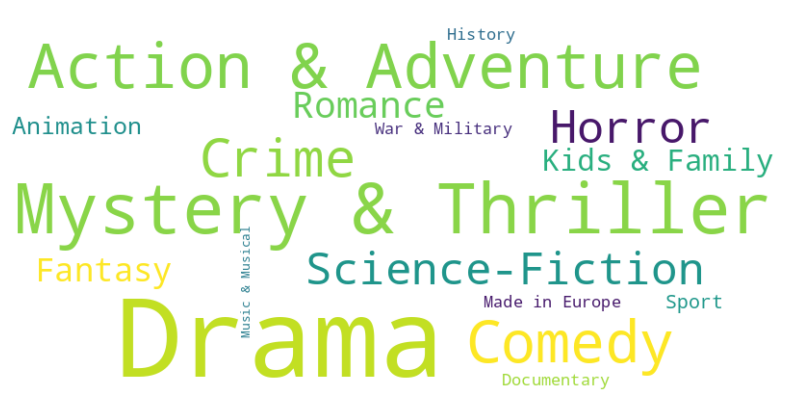

In [90]:
# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Finding Predominant Streaming Service

In [94]:
# Step 1: Concatenate all platforms
all_platforms = ', '.join(movie_df['steaming_on'].dropna())
all_platforms

'Amazon Prime Video, MUBI, Apple TV, Bookmyshow, Netflix, Bookmyshow, Amazon Prime Video, Netflix, Bookmyshow, Netflix, Netflix, Apple TV, Netflix, Hotstar, Amazon Prime Video, aha, Zee5, Amazon Prime Video, Hotstar, Hotstar, Hotstar, Bookmyshow, Amazon Prime Video, Amazon Prime Video, Apple TV, Amazon Prime Video, Amazon Prime Video, Bookmyshow, Bookmyshow, Amazon Prime Video, Netflix, Bookmyshow, Amazon Prime Video, Amazon Prime Video, Netflix, Apple TV, Hotstar, Amazon Prime Video, Apple TV, VI movies and tv, Bookmyshow, Apple TV, Chaupal Amazon Channel, Netflix, Amazon Prime Video, Netflix, Jio Cinema, Netflix, VI movies and tv, Amazon Prime Video, Hotstar, Amazon Prime Video, Amazon Prime Video, VI movies and tv, Apple TV, Amazon Prime Video, Sony Liv, Jio Cinema, Netflix, Apple TV, Amazon Prime Video, Bookmyshow, Amazon Prime Video, Amazon Prime Video, Apple TV, Netflix, Apple TV, Netflix, Apple TV, Hotstar, Apple TV, Netflix, Netflix, Amazon Prime Video, Apple TV, Amazon Prime V

In [95]:
# Step 2: Split the genres and count occurrences
platform_counts = Counter(all_platforms.split(', '))
platform_counts

Counter({'Amazon Prime Video': 27,
         'MUBI': 2,
         'Apple TV': 15,
         'Bookmyshow': 11,
         'Netflix': 25,
         'Hotstar': 9,
         'aha': 1,
         'Zee5': 3,
         'VI movies and tv': 3,
         'Chaupal Amazon Channel': 1,
         'Jio Cinema': 3,
         'Sony Liv': 3,
         'Amazon Video': 1})

In [96]:
# Step 3: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_counts)
wordcloud

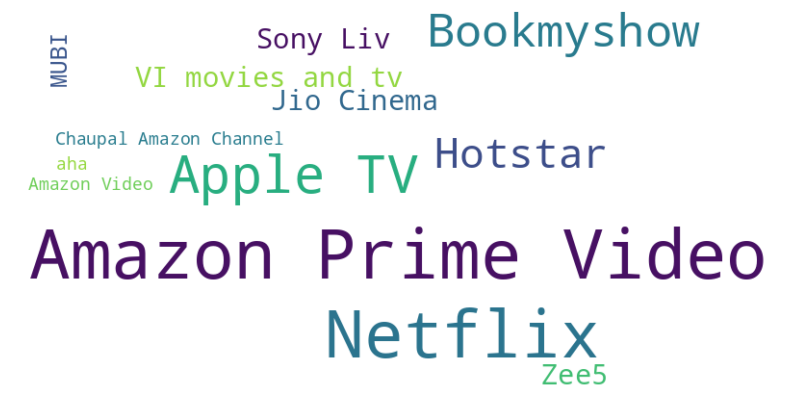

In [97]:
# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Task 3 :- Data Export

In [98]:
movie_df.to_csv('Movies Dataframe.csv')

In [99]:
tv_df.to_csv('TV Show Dataframe.csv')

# MOVIE DF

https://drive.google.com/file/d/1oqPJtH0NH1StpAg1oVe0PyL0JDTfvMow/view?usp=sharing

# TV SHOW DF

https://drive.google.com/file/d/1QOEKLREA6KB3DtAv49QRSdnNgdVhTOwE/view?usp=sharing